# Correlation of returns: why it matters, and how to analyse it with Python

## 1. Introduction
Understanding the correlation of returns between different asset classes is a key concept in finance and investment. For instance, analysing the correlation between QQQ (Nasdaq-100 ETF) and SPY (S&P 500 ETF), 2 US Equity assets, can provide critical insights into market behavior, risk assessment, and portfolio diversification. By examining their correlation, investors can make informed decisions that balance risk and return effectively.

In this blog post, we'll explore the importance of correlation of returns, particularly focusing on QQQ and SPY using for this example weekly returns spanning 52 observations. Empirically, I found weekly returns to be an useful sweet spot between data quality, stability and number of estimation points.  

We'll also delve into the core concepts, key formulas, and provide a comprehensive set of Python examples using various libraries. Let's get started!



## 2. Concept and Key Formula
The correlation of returns measures the degree to which two securities move in relation to one another. 


There are different approaches to estimate it, but one usually relies on the so-called Spearman correlation coefficient. Its fundamental formula for correlation is:

**Correlation Formula**
$$
\rho(X\,Y)=\frac{Cov(X, Y)}{\sigma_X\,\sigma_Y}
$$

Where:

- $\rho(X, Y)$ is the correlation coefficient between asset X and asset Y.
- $Cov(X, Y)$ is the covariance between the returns of assets X and Y.
- $\sigma_X$ is the standard deviation of asset X's returns.
- $\sigma_Y$ is the standard deviation of asset Y's returns.

#### Parameters Breakdown:

- **Covariance ($Cov(X, Y)$)**: Indicates how two variables move together.
- **Standard Deviation ($\sigma$)**: Measures the volatility or risk associated with a given security.


#### Expected Results:

This formula results in a correlation coefficient ranging from -1 to 1. 

There are 3 idealized values:

- **+1**: Perfect positive correlation
- **-1**: Perfect negative correlation
- **0**: No correlation

Understanding these parameters helps us derive insightful conclusions on the correlation of returns.

## 3. Visualization and Analysis

### Chart 1: Price History of QQQ and SPY
Visualizing the price history over the long term can help identify trends and significant events impacting both QQQ and SPY ETFs. We'll use the yfinance library to fetch historical data and matplotlib for plotting.


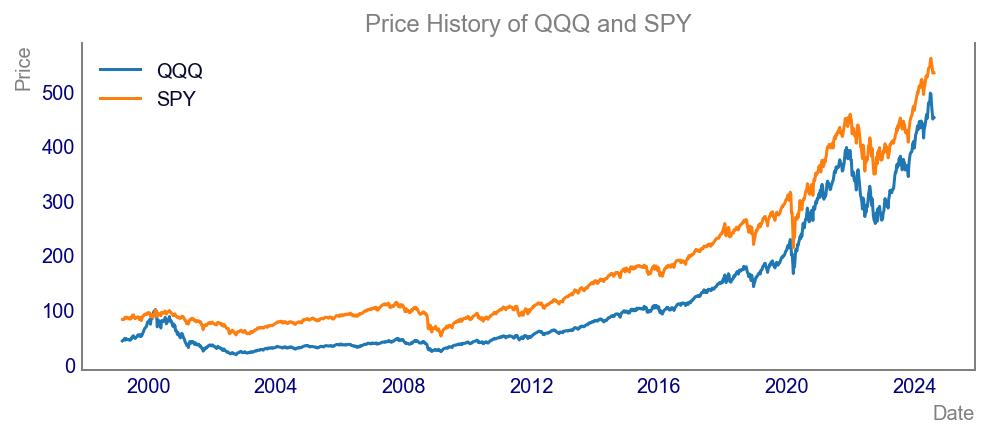

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch data
qqq = yf.Ticker('QQQ')
spy = yf.Ticker('SPY')

qqq_hist = qqq.history(period='max', interval='1wk')
spy_hist = spy.history(period='max', interval='1wk')

spy_hist = spy_hist.reindex(qqq_hist.index)
# Plotting price history
plt.style.use('getting_started-chart.mplstyle')
fig, ax = plt.subplots()
ax.plot(qqq_hist.index, qqq_hist['Close'], label='QQQ')
ax.plot(spy_hist.index, spy_hist['Close'], label='SPY')
ax.set_title("Price History of QQQ and SPY")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.show()


### Chart 2: Weekly Returns

Having retrieved uncharted the price of QQQ SPY, it's now time to look at their returns. There is a very handy function **pct_change()** in the pandas library That enables us to convert directly price time series 2 return *timeseries*.

As our price *timeseries* is already in weekly frequency, we can directly use **pct_change()** to get the weekly returns and plot them using matplotlib. 

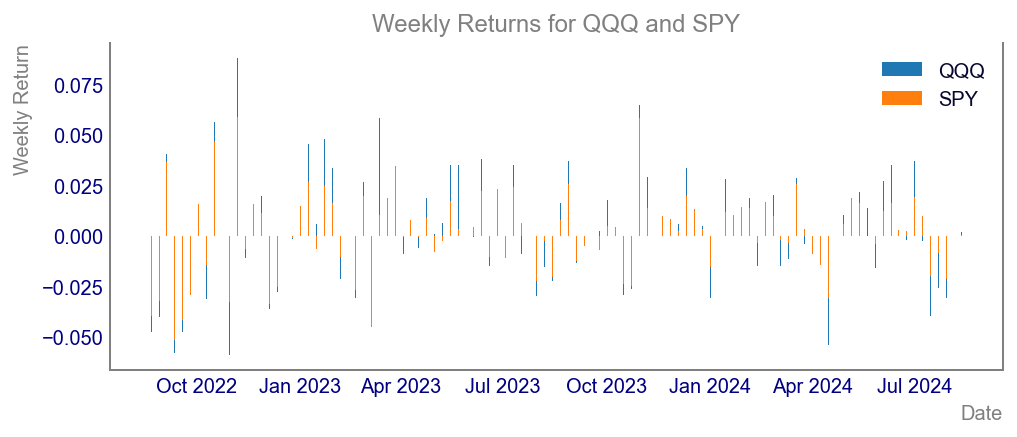

In [2]:
qqq_hist['Return'] = qqq_hist['Close'].pct_change()
spy_hist['Return'] = spy_hist['Close'].pct_change()

plt.style.use('getting_started-chart.mplstyle')
fig, ax = plt.subplots()
ax.bar(qqq_hist.tail(104).index, qqq_hist['Return'].tail(104), label='QQQ')
ax.bar(spy_hist.tail(104).index, spy_hist['Return'].tail(104), label='SPY')
ax.set_title("Weekly Returns for QQQ and SPY")
ax.set_xlabel("Date")
ax.set_ylabel("Weekly Return")
ax.legend()
plt.show()


From the chart above, we can see that the QQQ ETF delivers much higher returns, on the upside and on the downside. From a correlation perspective we can see that when spy is up, QQQ is up to often higher, but overall, they typically evolve in the same direction. As you can guess, this probably indicates a high level of coalition between these two assets. . 

It's time to look at a more precise way to analyse every returns.

### Chart 3: Distribution of Weekly Returns

Indeed, the histogram is an excellent tool to visualize the distribution of weekly returns for each ETF. It aids in understanding the frequency and volatility associated with the returns. Went to distribution are plotted one on top of the other, it becomes very easy to compare the two distributions. 

As you can see below, The distribution of the spy etf is much more narrow compared to QQQ which is a confirmation of the quick insights which caome from the previous chart. 


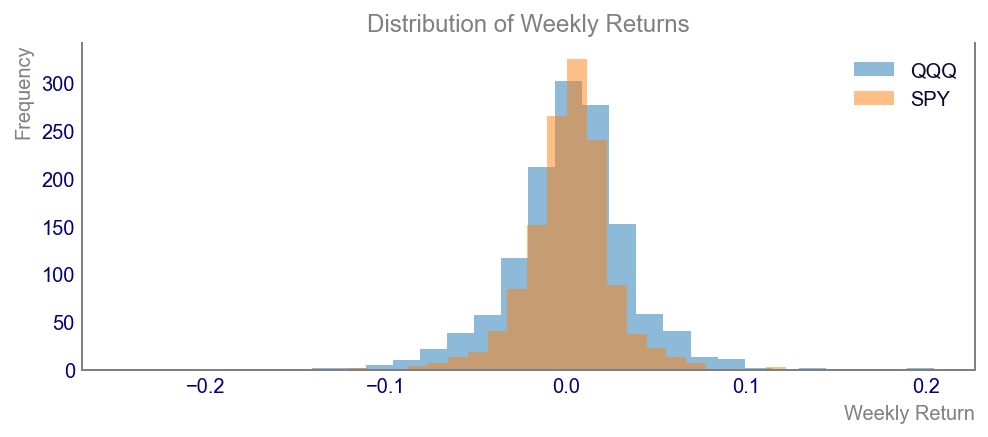

In [3]:
plt.style.use('getting_started-chart.mplstyle')
fig, ax = plt.subplots()
ax.hist(qqq_hist['Return'].dropna(), bins=30, alpha=0.5, label='QQQ')
ax.hist(spy_hist['Return'].dropna(), bins=30, alpha=0.5, label='SPY')
ax.set_title("Distribution of Weekly Returns")
ax.set_xlabel("Weekly Return")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()


### Chart 4: Rolling Volatility
Calculating rolling volatility (standard deviation of returns) over a specified period (e.g., 52 weeks) assists in identifying periods of high or low market uncertainty for both ETFs.


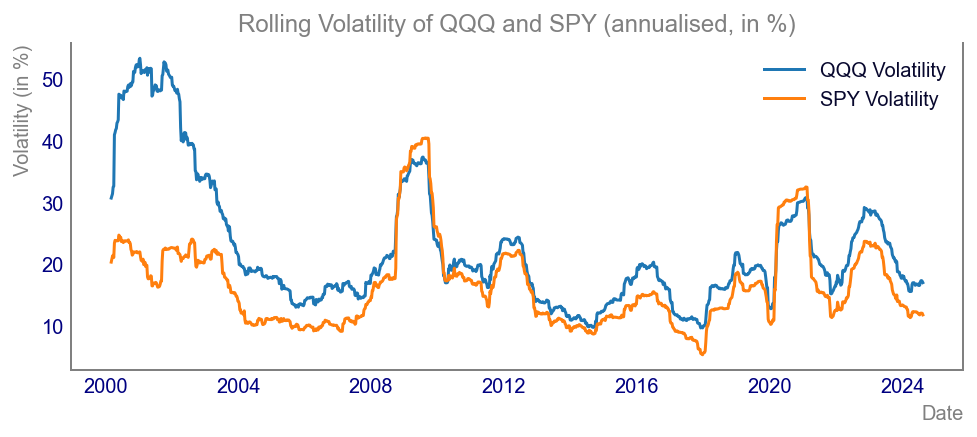

In [4]:
qqq_hist['Rolling_Vol'] = qqq_hist['Return'].rolling(window=52).std() * (52**0.5) * 100
spy_hist['Rolling_Vol'] = spy_hist['Return'].rolling(window=52).std()* (52**0.5) * 100

plt.style.use('getting_started-chart.mplstyle')
fig, ax = plt.subplots()
ax.plot(qqq_hist.index, qqq_hist['Rolling_Vol'], label='QQQ Volatility')
ax.plot(spy_hist.index, spy_hist['Rolling_Vol'], label='SPY Volatility')
ax.set_title("Rolling Volatility of QQQ and SPY (annualised, in %)")
ax.set_xlabel("Date")
ax.set_ylabel("Volatility (in %)")
ax.legend()
plt.show()


### Chart 5: Scatter Plot of Weekly Returns with Correlation
To visually understand the relationship between the weekly returns of QQQ and SPY, a scatter plot is effective. We'll add a best-fit line to see the correlation.


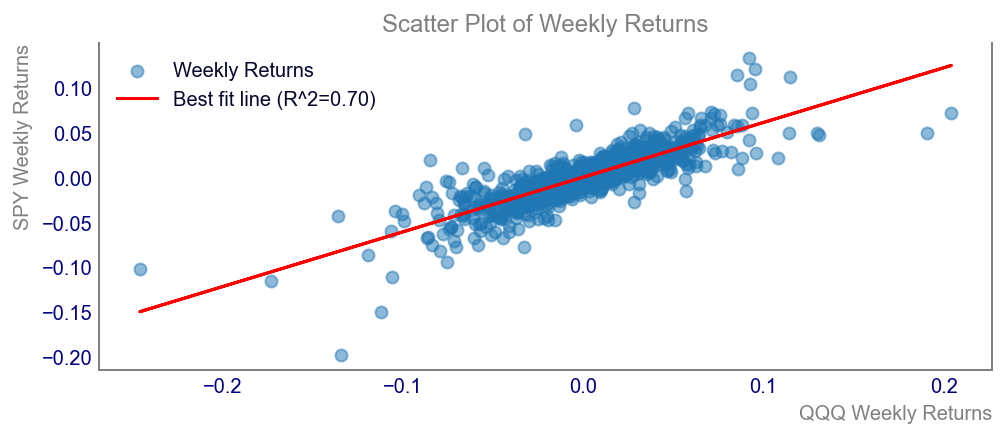

In [5]:
from scipy.stats import linregress

plt.style.use('getting_started-chart.mplstyle')
fig, ax = plt.subplots()
ax.scatter(qqq_hist['Return'], spy_hist['Return'], alpha=0.5, label='Weekly Returns')

# Best fit line
slope, intercept, r_value, p_value, std_err = linregress(qqq_hist['Return'].dropna(), spy_hist['Return'].dropna())
ax.plot(qqq_hist['Return'], intercept + slope*qqq_hist['Return'], 'r', label=f'Best fit line (R^2={r_value**2:.2f})')

ax.set_title("Scatter Plot of Weekly Returns")
ax.set_xlabel("QQQ Weekly Returns")
ax.set_ylabel("SPY Weekly Returns")
ax.legend()
plt.show()


### Chart 6: Rolling Window Correlation
To visually understand the relationship between the weekly returns of QQQ and SPY, it might be useful to look at how the correlation itself evolves across time. That's where a rolling window correlation might help.


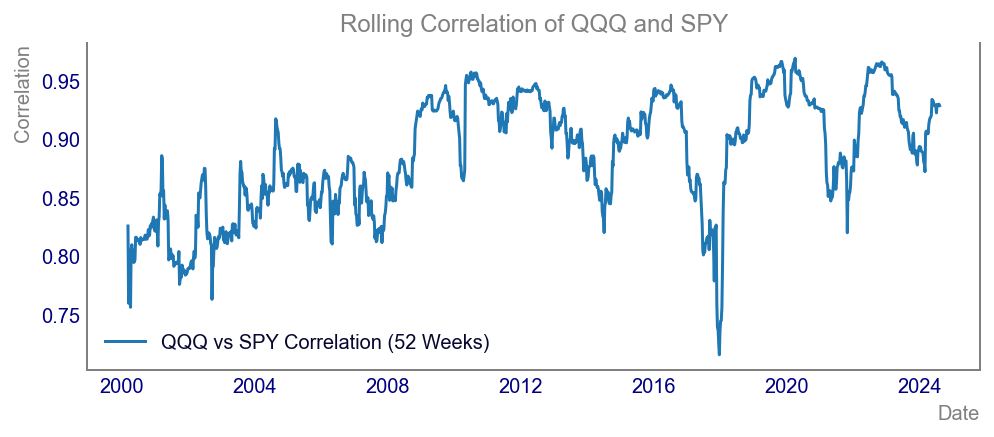

In [6]:
qqq_hist['Rolling_Vol'] = qqq_hist['Return'].rolling(window=52).corr(other=spy_hist['Return'])

plt.style.use('getting_started-chart.mplstyle')
fig, ax = plt.subplots()
ax.plot(qqq_hist.index, qqq_hist['Rolling_Vol'], label='QQQ vs SPY Correlation (52 Weeks)')
ax.set_title("Rolling Correlation of QQQ and SPY")
ax.set_xlabel("Date")
ax.set_ylabel("Correlation")
ax.legend()
plt.show()


## Conclusion
Understanding the correlation between QQQ and SPY is valuable for making informed portfolio decisions. It aids in the diversification, risk management, and insight into market trends. 

While correlation is a powerful tool, it comes with limitations:

- It relies on historical data which may not reflect future market conditions, 
- It assumes a linear relationship,
- It sometimes oversimplifies the relationship between assets. 

Nevertheless, calculating and visualising correlation helps in understanding market dynamics and improving investment strategies.

If you are curious to learn more, check out these resources:

- [Investopedia on Correlation](https://www.investopedia.com/terms/c/correlation.asp)
- [QuantStart on Financial Time Series](https://www.quantstart.com/articles/Using-Python-and-Pandas-for-Analyzing-Financial-Data)

To see this tutorial in action, don’t miss the video on our Data Driven Minutes Youtube channel. Happy coding!